## Medical Insurance Cost


#### Problem

Prediction of Insurance charge based on human factors 

In [29]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [143]:
df = pd.read_csv('medical_charge.csv')

In [144]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
df.tail()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


In [146]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [24]:
data = []
for col in df.columns:
    data.append({'Column' : col,'Unique' : len(df[col].unique()),
        'Null Count' : df[col].isnull().sum(),
        'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

,Column,Unique,Null Count,Null Percentage
0,age,47,0,0.0
1,sex,2,0,0.0
2,bmi,548,0,0.0
3,children,6,0,0.0
4,smoker,2,0,0.0
5,region,4,0,0.0
6,charges,1337,0,0.0


There are no null Values in the dataset 

In [82]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [100]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Univariant Analysis 

In [34]:
#Male and female ratio in the dataset
g_index = df['sex'].value_counts().index
g_value = df['sex'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

Male and Female ratio are equally distributed over the dataset

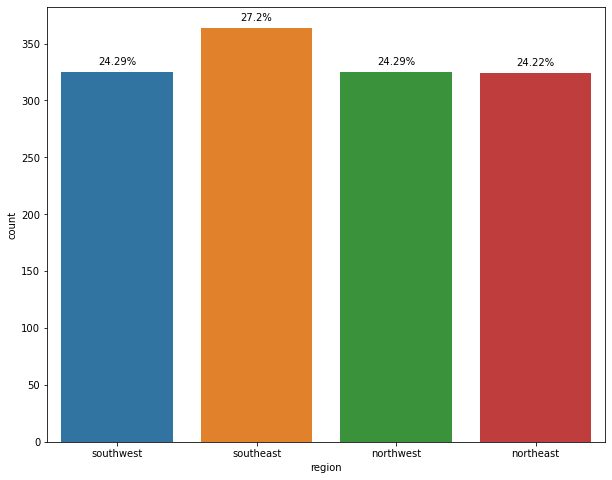

In [79]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df['region'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df, x= 'region') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

southeast region have more users who availed insurance and all other region are equally distributed

<AxesSubplot:xlabel='smoker', ylabel='count'>

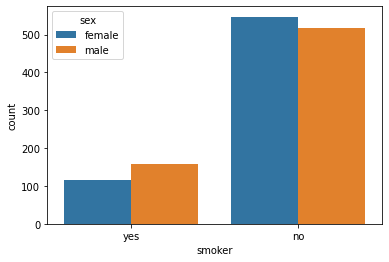

In [97]:
sns.countplot(x='smoker',data=df,hue='sex')

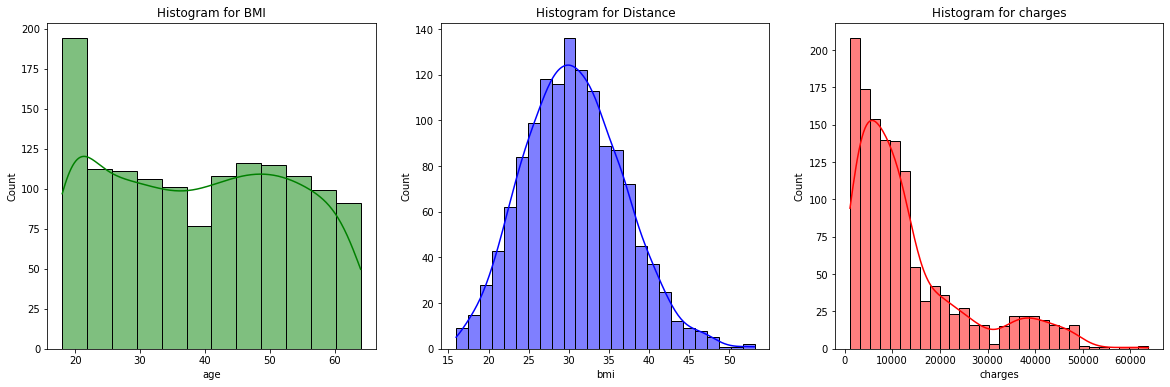

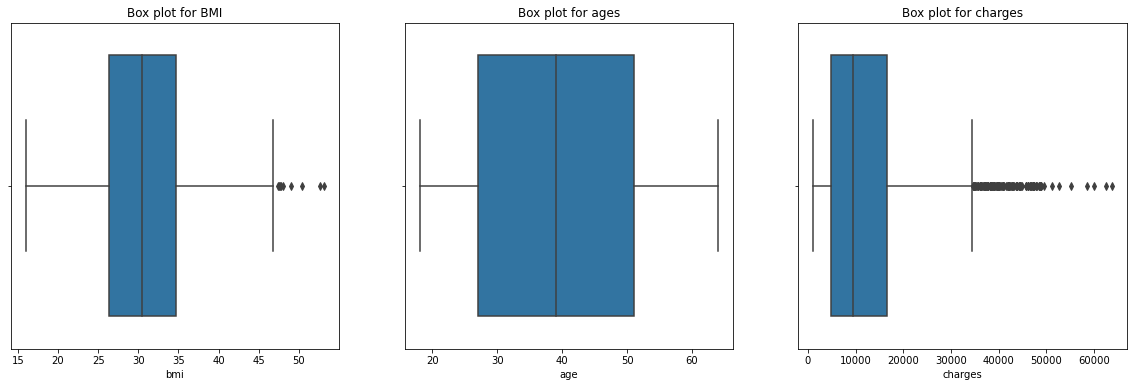

In [137]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Histogram for BMI')
sns.histplot(df['age'],color='green',kde = True)

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Histogram for Distance')
sns.histplot(df['bmi'],color='blue',kde = True)

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Histogram for charges')
sns.histplot(df['charges'],color='red',kde = True)

plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.title('Box plot for BMI')
sns.boxplot(x=df["bmi"])

plt.subplot(1,3,2)
plt.title('Box plot for ages')
sns.boxplot(x=df["age"])

plt.subplot(1,3,3)
plt.title('Box plot for charges')
sns.boxplot(x=df["charges"])

plt.show()

1. Most of the users who took issurance are adults from age 15 to 25
2. The BMI column is equally distributed and Insurance charge lies in between 0 to 60000
3. There are some outliers in BMI and charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

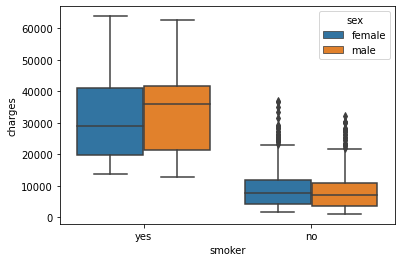

In [46]:
sns.boxplot(x="smoker",y="charges",data=df,hue="sex")

This data shows male and female who are smoker have high insurance rate compared to non-smokers 
There are some outliers for non-smokers in both male and female

In [148]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


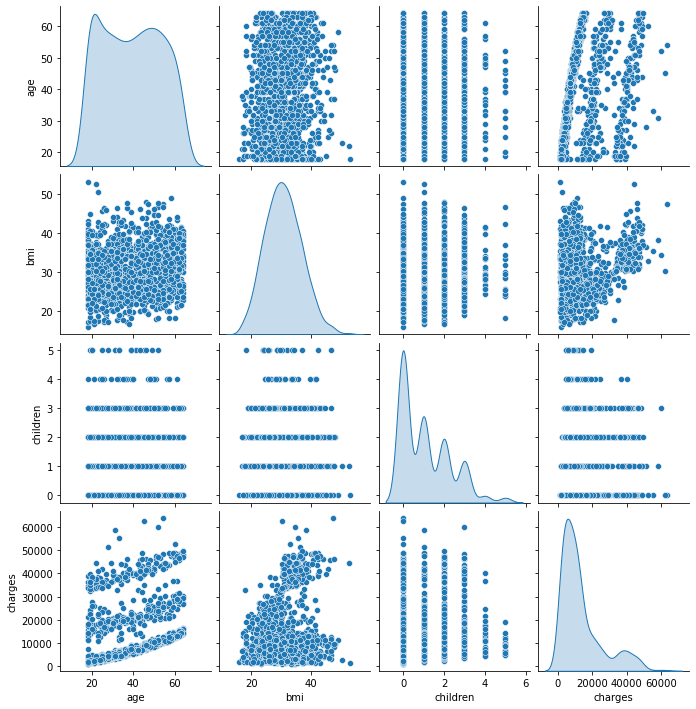

In [93]:
sns.pairplot(df, diag_kind='kde')

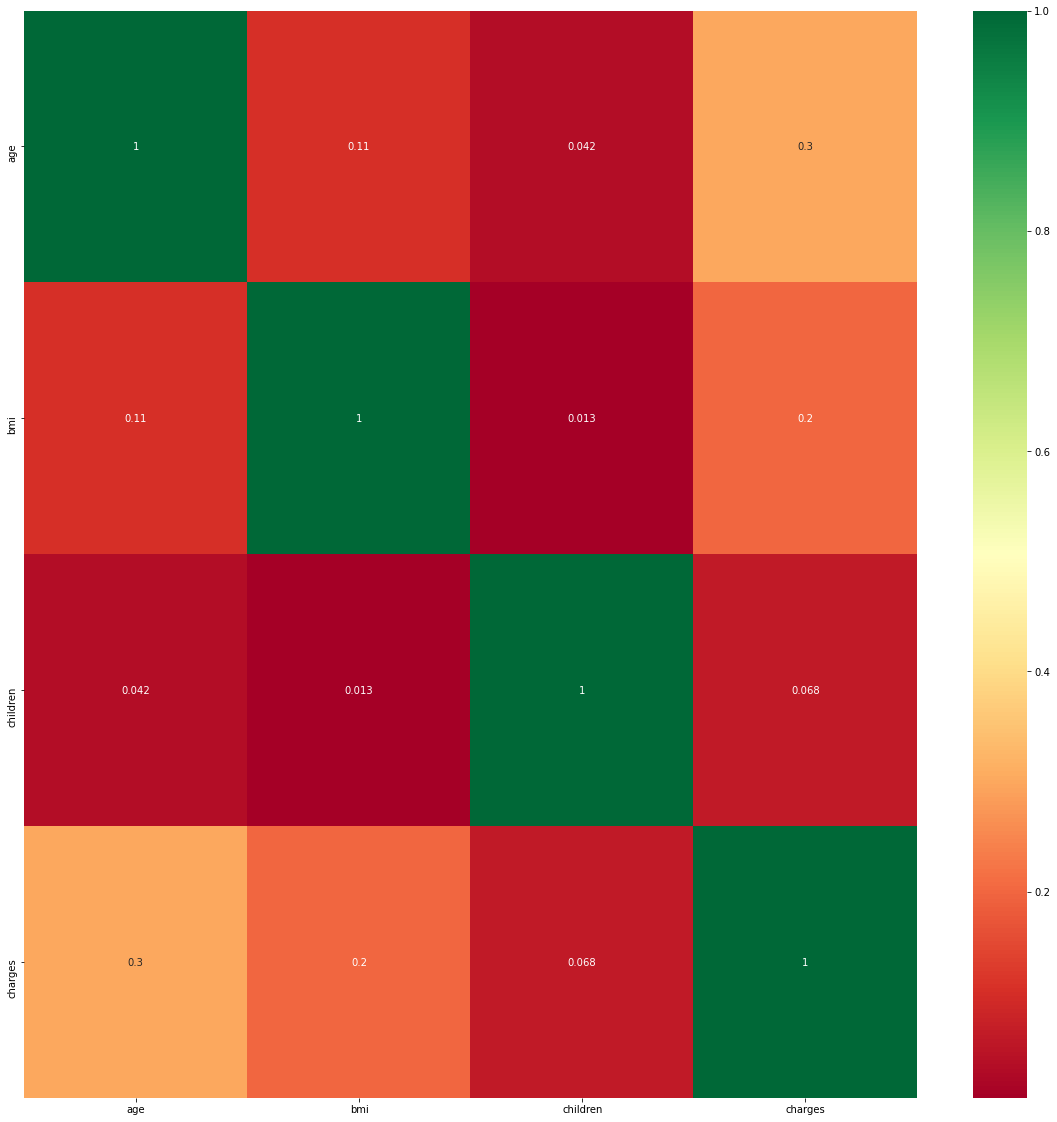

In [99]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

By observing all the three corelation graphs we can conclude that charges dependent variable has no stong postive corelation with a single independent variable. 

#### Conclusion

BMI has a outlier of above 45 and charges range from 1000 to 60000
As we observed above Sex and Region are categorical variable for the further regression we need to encode these values into numberical and then apply the Regression Algorithm